<a href="https://colab.research.google.com/github/Potter943/code_memory/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

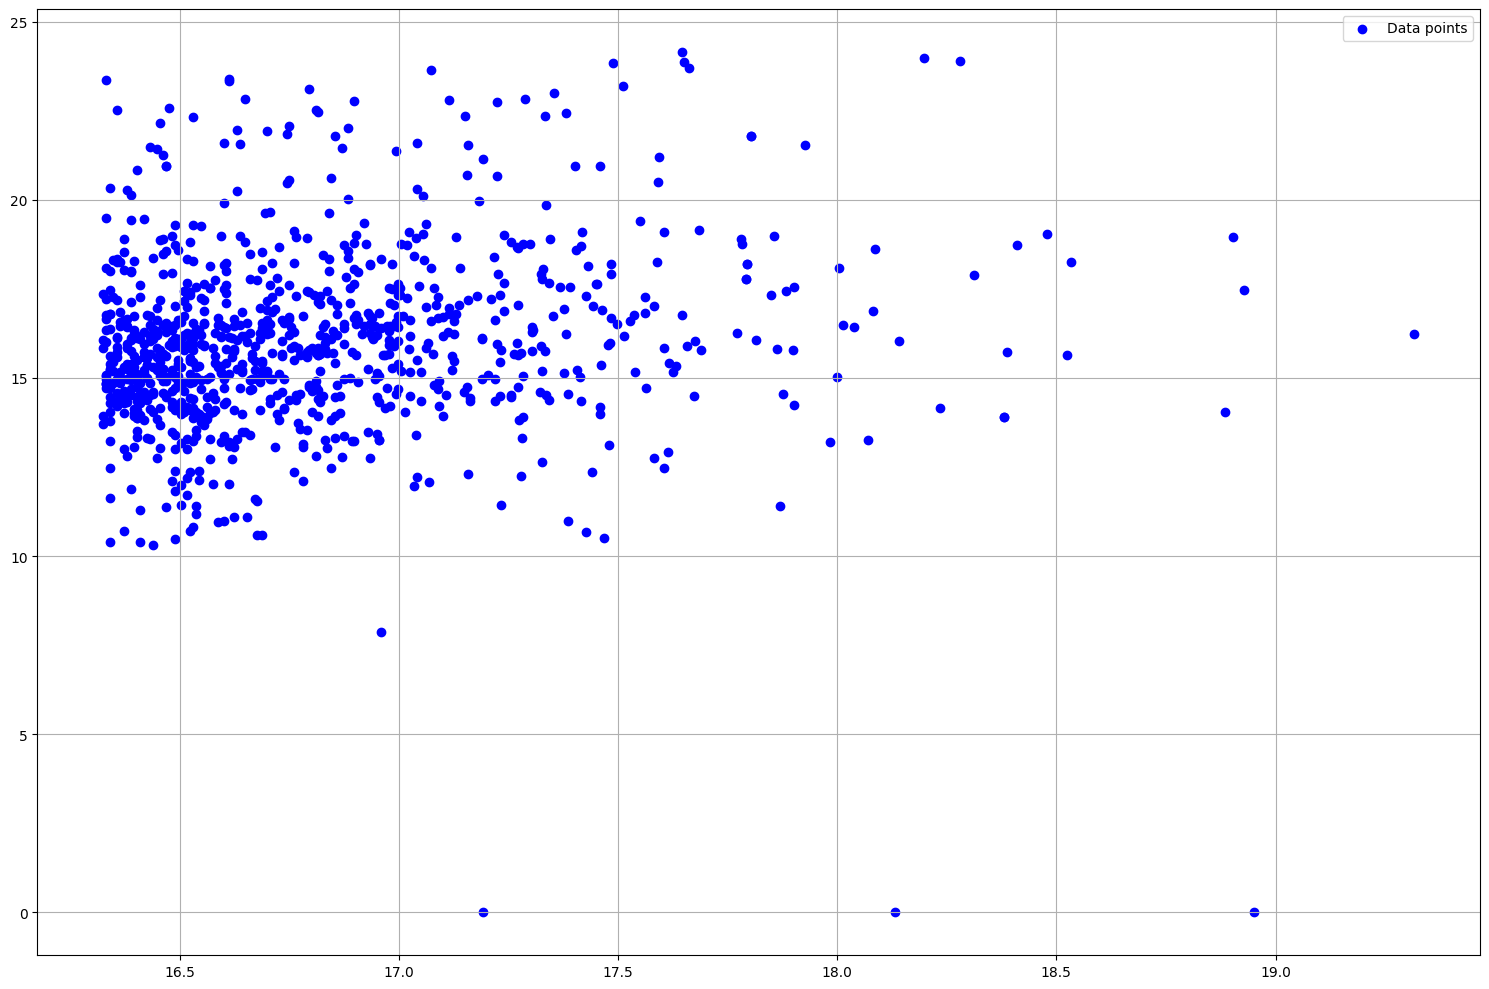

In [ ]:
#Q1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv(r"/content/Global_YouTube_Statistics.csv", encoding='latin-1')
file = file.dropna(subset=['subscribers', 'video views', 'uploads'])
file = file[file['uploads'] != 0]

subscribers = file['subscribers'].astype(float).to_numpy()
views = file['video views'].astype(float).to_numpy()
uploads = file['uploads'].astype(float).to_numpy()

average_view = np.divide(views,uploads)

plt.figure(figsize = (15,10))
plt.scatter(np.log1p(subscribers),np.log1p(average_view),color = 'blue',label = 'Data points')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Q2
import pandas as pd
import numpy as np

file = pd.read_csv(r"/content/Global_YouTube_Statistics.csv", encoding='latin-1')
file = file.dropna(subset=['subscribers', 'video views', 'uploads'])
file = file[file['uploads'] != 0]

subscribers = file['subscribers'].astype(float).to_numpy() #x
views = file['video views'].astype(float).to_numpy()
uploads = file['uploads'].astype(float).to_numpy()

average_view = np.divide(views,uploads) #y

x_mean = np.mean(subscribers)
y_mean = np.mean(average_view)
n = len(subscribers)

a0 = 0.0
a1 = 0.0
learning_rate = 0.001
epochs = 1000

for i in range(epochs):
	y_pred = a0 + a1*subscribers
	error = y_pred - average_view

	delta_a0 = np.mean(error)
	delta_a1 = np.mean(subscribers*error)

	a0 = a0 - learning_rate*delta_a0
	a1 = a1 - learning_rate*delta_a1

test = np.array([1000000,10000000,30000000,50000000,100000000])
pred = a0 + a1*test

print(pred)

subscribers_normalised = (subscribers - x_mean) / np.std(subscribers)
average_view_normalised = (average_view - y_mean) / np.std(average_view)

norm_a0 = 0.0
norm_a1 = 0.0
for i in range(epochs):
	y_norm_pred = norm_a0 + norm_a1*subscribers_normalised
	norm_error = y_norm_pred - average_view_normalised

	norm_delta_a0 = np.mean(norm_error)
	norm_delta_a1 = np.mean(subscribers_normalised*norm_error)

	norm_a0 = norm_a0 - learning_rate*norm_delta_a0
	norm_a1 = norm_a1 - learning_rate*norm_delta_a1

norm_test = (test - np.mean(test))/np.std(test)
norm_pred = norm_a0 + norm_a1*norm_test

real_pred = norm_pred*np.std(average_view) + y_mean

print(norm_pred)
print(real_pred)

[nan nan nan nan nan]
[-0.08905939 -0.06751276 -0.01963137  0.02825002  0.1479535 ]
[2.22364992e+08 2.73764139e+08 3.87984464e+08 5.02204790e+08
 7.87755604e+08]


/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-5-dd0f6cd00544>:28: RuntimeWarning: overflow encountered in multiply
  delta_a1 = np.mean(subscribers*error)
<ipython-input-5-dd0f6cd00544>:30: RuntimeWarning: invalid value encountered in scalar subtract
  a0 = a0 - learning_rate*delta_a0
<ipython-input-5-dd0f6cd00544>:31: RuntimeWarning: invalid value encountered in scalar subtract
  a1 = a1 - learning_rate*delta_a1


In [ ]:
#Q3
import pandas as pd
import numpy as np

file = pd.read_csv(r"/content/Global_YouTube_Statistics.csv", encoding='latin-1')
#nan 값이 있는 행 삭제 & upload가 0이면 삭제
file = file.dropna(subset=['subscribers', 'video views', 'uploads'])
file = file[file['uploads'] != 0]

subscribers = file['subscribers'].astype(float).to_numpy() #x
views = file['video views'].astype(float).to_numpy()
uploads = file['uploads'].astype(float).to_numpy()
#print(uploads)
#print('---upload---')
average_view = np.divide(views,uploads) #y
#print(average_view)

x_mean = np.mean(subscribers)
y_mean = np.mean(average_view)
n = len(subscribers)

subscribers_normalised = (subscribers - x_mean) / np.std(subscribers)
average_view_normalised = (average_view - y_mean) / np.std(average_view)

a0 = 0.0
a1 = 0.0
learning_rate = 0.01
epochs = 1000

for i in range(epochs):
	y_pred = a0 + a1*subscribers_normalised
	error = y_pred - average_view_normalised

	delta_a0 = np.mean(error)
	delta_a1 = np.mean(subscribers_normalised*error)

	a0 = a0 - learning_rate*delta_a0
	a1 = a1 - learning_rate*delta_a1


#performance test
norm_pred = a0 + a1*subscribers_normalised

test_error = average_view_normalised - norm_pred
MSE = np.mean(test_error**2)

SST = np.sum((average_view_normalised - np.mean(average_view_normalised))**2)
SSR = np.sum((average_view_normalised - norm_pred)**2)
r_squared = 1- (SSR/SST)

print('MSE:',MSE)
print('r_squared:',r_squared)

test_error = np.abs(test_error)
top_10 = np.argsort(test_error)[::-1][:10]


for i in top_10:
  print(average_view[i])
  #print(subscribers[i])
  #print(views[i])
  #print(uploads[i])
  #print('-----')

MSE: 0.9822098878640826
r_squared: 0.017790112135917857
30686342319.0
26236790209.0
24118230580.0
22936630813.0
22302547082.0
19398045702.0
18597534412.0
14431830557.0
13959586308.0
13478392540.0


In [ ]:
#Q4
import pandas as pd
import numpy as np

file = pd.read_csv(r"/content/Global_YouTube_Statistics.csv", encoding ='latin-1')
file = file.dropna(subset=['subscribers','video views','uploads','video_views_rank','channel_type_rank','video_views_for_the_last_30_days','subscribers_for_last_30_days'])
file = file[file['uploads'] != 0]

x1 = file['subscribers'].astype(float).to_numpy()
x2 = file['video_views_rank'].astype(float).to_numpy()
x3 = file['channel_type_rank'].astype(float).to_numpy()
x4 = file['video_views_for_the_last_30_days'].astype(float).to_numpy()
x5 = file['subscribers_for_last_30_days'].astype(float).to_numpy()

views = file['video views'].astype(float).to_numpy()
uploads = file['uploads'].astype(float).to_numpy()
y = np.divide(views,uploads) #average_view
x1_mean = np.mean(x1)
x2_mean = np.mean(x2)
x3_mean = np.mean(x3)
x4_mean = np.mean(x4)
x5_mean = np.mean(x5)
y_mean = np.mean(y)

x1_std = np.std(x1)
x2_std = np.std(x2)
x3_std = np.std(x3)
x4_std = np.std(x4)
x5_std = np.std(x5)
y_std = np.std(y)
n = len(y)

norm_x1 = (x1 - x1_mean) / x1_std
norm_x2 = (x2 - x2_mean) / x2_std
norm_x3 = (x3 - x3_mean) / x3_std
norm_x4 = (x4 - x4_mean) / x4_std
norm_x5 = (x5 - x5_mean) / x5_std
norm_y = (y - y_mean) / y_std

a0,a1,a2,a3,a4,a5 = 0,0,0,0,0,0
learning_rate = 0.005
epochs = 1000

for i in range(epochs):
    y_pred = a0 + a1 * norm_x1 + a2 * norm_x2 + a3 * norm_x3 + a4 * norm_x4 + a5 * norm_x5
    error = y_pred - norm_y

    # Gradient descent
    a0 = a0 - learning_rate * np.mean(error)
    a1 = a1 - learning_rate * np.mean(error * norm_x1)
    a2 = a2 - learning_rate * np.mean(error * norm_x2)
    a3 = a3 - learning_rate * np.mean(error * norm_x3)
    a4 = a4 - learning_rate * np.mean(error * norm_x4)
    a5 = a5 - learning_rate * np.mean(error * norm_x5)

print('a0:', a0)
print('a1:', a1)
print('a2:', a2)
print('a3:', a3)
print('a4:', a4)
print('a5:', a5)

# Performance test
norm_pred_y = a0 + a1 * norm_x1 + a2 * norm_x2 + a3 * norm_x3 + a4 * norm_x4 + a5 * norm_x5

test_error = norm_y - norm_pred_y
MSE = np.mean(test_error**2)

SST = np.sum((norm_y - np.mean(norm_y))**2)
SSR = np.sum((norm_y - norm_pred_y)**2)
r_squared = 1- (SSR/SST)

print('MSE:',MSE)
print('r_squared:',r_squared)

a0: -3.2649549384615162e-18
a1: 0.10358401651205723
a2: 0.32166057486395333
a3: 0.1309053882278069
a4: -0.05621198829598241
a5: -0.007695222869410586
MSE: 0.7834341120634128
r_squared: 0.2165658879365875
